🚩**Name:  TJ Zhang**

**Email: tjzhang@u.boisestate.edu**

### Set up

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from census import Census
from us import states

### Read Census data in state_pop

In [2]:
c = Census('279e38280cd89b39289e78c8b5696150b6d67ba0')

In [3]:
state_pop = pd.DataFrame.from_records(c.acs5.state(('NAME', 'B05010_001E', 'B05010_002E'), '*', year=2014))
state_pop['Poverty_level']=state_pop['B05010_002E']/state_pop['B05010_001E']
state_pop.head()

,NAME,B05010_001E,B05010_002E,state,Poverty_level
0,Alabama,1048560.0,281052.0,01,0.268036
1,Alaska,179242.0,23963.0,02,0.133691
2,Arizona,1532525.0,385737.0,04,0.251700
3,Arkansas,663036.0,179070.0,05,0.270076
4,California,8778017.0,1945049.0,06,0.221582


### Read GHDx data in meningitis and Diarrheal_diseases

In [4]:
meningitis = pd.read_excel('IHME_USA_COUNTY_INFECT_DIS_MORT_1980_2014_NATIONAL_Y2018M03D27.XLSX',
                        sheet_name='Meningitis', header=1, skipfooter=2)
meningitis['Mortality'] = meningitis['Mortality Rate, 2014*'].str.replace(r'\s*\(.+\)', '').astype('f8')
Diarrheal_diseases = pd.read_excel('IHME_USA_COUNTY_INFECT_DIS_MORT_1980_2014_NATIONAL_Y2018M03D27.XLSX',
                        sheet_name='Diarrheal diseases', header=1, skipfooter=2)
Diarrheal_diseases['Mortality'] = Diarrheal_diseases['Mortality Rate, 2014*'].str.replace(r'\s*\(.+\)', '').astype('f8')

<ipython-input-4-a8f57dc5eaa4>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  meningitis['Mortality'] = meningitis['Mortality Rate, 2014*'].str.replace(r'\s*\(.+\)', '').astype('f8')
<ipython-input-4-a8f57dc5eaa4>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  Diarrheal_diseases['Mortality'] = Diarrheal_diseases['Mortality Rate, 2014*'].str.replace(r'\s*\(.+\)', '').astype('f8')


**merge state_pop and meningitis as pop_meningitis**

In [5]:
pop_meningitis=pd.merge(state_pop[['NAME', 'Poverty_level']].rename(columns={'NAME': 'Location'}),
         meningitis[['Location','Mortality']].rename(columns={'Mortality':'Mortality_meningitis'}), on='Location')

**merge pop_meningitis and Diarrheal_diseases as pop_Diarrheal_meningitis**

In [6]:
pop_Diarrheal_meningitis=pd.merge(pop_meningitis,
         Diarrheal_diseases[['Location','Mortality']].rename(columns={'Mortality':'Mortality_Diarrheal'}), 
                                  on='Location')
pop_Diarrheal_meningitis.head()

,Location,Poverty_level,Mortality_meningitis,Mortality_Diarrheal
0,Alabama,0.268036,0.58,2.41
1,Alaska,0.133691,0.43,1.34
2,Arizona,0.251700,0.43,2.55
3,Arkansas,0.270076,0.52,2.02
4,California,0.221582,0.31,2.21


### Read CDC data as infant_motality

In [7]:
infant_motality=pd.read_csv('Infant_Mortality.csv')

We are interested about the data in 'YEAR'=2014

In [8]:
infant_motality2014=infant_motality[infant_motality.YEAR.isin([2014])]

**link data**

In [9]:
statechange=pd.read_table('state.txt', sep='|')

**merge infant_motality2014 and statechange**

In [10]:
infant_motality2014_1=pd.merge(infant_motality2014,
                               statechange[['STUSAB','STATE_NAME']].rename(columns={'STUSAB': 'STATE'}),on='STATE')
infant_motality2014_1.head()

,YEAR,STATE,RATE,DEATHS,URL,STATE_NAME
0,2014,AL,8.67,515,/nchs/pressroom/states/alabama.htm,Alabama
1,2014,AK,6.67,76,/nchs/pressroom/states/alaska.htm,Alaska
2,2014,AZ,6.1,530,/nchs/pressroom/states/arizona.htm,Arizona
3,2014,AR,7.48,288,/nchs/pressroom/states/arkansas.htm,Arkansas
4,2014,CA,4.32,2173,/nchs/pressroom/states/california.htm,California


### Merge Census, GHDx, CDC together

In [11]:
DATA=pd.merge(pop_Diarrheal_meningitis.rename(columns={'Location': 'STATE_NAME'}),
         infant_motality2014_1[['RATE','STATE_NAME']].rename(columns={'RATE':'Mortality_Infant'}), on='STATE_NAME')
DATA['Mortality_Infant']=DATA['Mortality_Infant'].astype('f8')
DATA.head()

,STATE_NAME,Poverty_level,Mortality_meningitis,Mortality_Diarrheal,Mortality_Infant
0,Alabama,0.268036,0.58,2.41,8.67
1,Alaska,0.133691,0.43,1.34,6.67
2,Arizona,0.251700,0.43,2.55,6.10
3,Arkansas,0.270076,0.52,2.02,7.48
4,California,0.221582,0.31,2.21,4.32


## After merging all the data sets, we can do the analysis now.

**After merging, the 'DATA' and 'state_pop' have a little different. The 'DATA' only has 50 states while the 'state_pop' has 52 regions.**

**This is the distribution of poverty level of all 52 regions (including 'Puerto Rico' and 'District of Columbia').**

In [12]:
state_pop['Poverty_level'].describe()

count    52.000000
mean      0.207473
std       0.070696
min       0.110946
25%       0.153843
50%       0.196620
75%       0.247620
max       0.566731
Name: Poverty_level, dtype: float64

**This is the distribution of poverty level of 50 states.**

In [13]:
DATA['Poverty_level'].describe()

count    50.000000
mean      0.199019
std       0.049121
min       0.110946
25%       0.150691
50%       0.192163
75%       0.240783
max       0.313809
Name: Poverty_level, dtype: float64

/Users/zhangtianjie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/zhangtianjie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Poverty_level', ylabel='Density'>

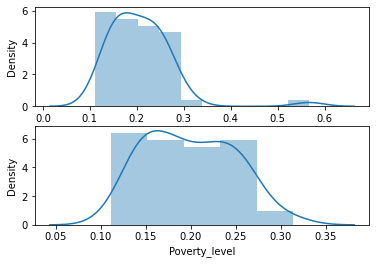

In [14]:
f0=plt.figure()
f0.add_subplot(2,1,1)
sns.distplot(state_pop['Poverty_level'])
f0.add_subplot(2,1,2)
sns.distplot(DATA['Poverty_level'])

*As we can see, the distribution of 52 regions is slightly right skewed while the distribution of 50 states is symmetric. The mean is near 0.2.*

/Users/zhangtianjie/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/zhangtianjie/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/zhangtianjie/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

<AxesSubplot:xlabel='Poverty_level', ylabel='Mortality_Infant'>

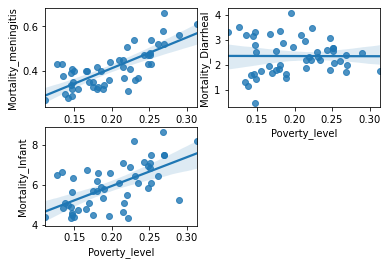

In [15]:
f=plt.figure()
f.add_subplot(2,2,1)
sns.regplot('Poverty_level', 'Mortality_meningitis', data=DATA)
f.add_subplot(2,2,2)
sns.regplot('Poverty_level', 'Mortality_Diarrheal', data=DATA)
f.add_subplot(2,2,3)
sns.regplot('Poverty_level', 'Mortality_Infant', data=DATA)

In [16]:
DATA[['Poverty_level','Mortality_meningitis','Mortality_Diarrheal','Mortality_Infant']].corr()

,Poverty_level,Mortality_meningitis,Mortality_Diarrheal,Mortality_Infant
Poverty_level,1.000000,0.755028,-0.004185,0.615467
Mortality_meningitis,0.755028,1.000000,0.016492,0.723628
Mortality_Diarrheal,-0.004185,0.016492,1.000000,0.045732
Mortality_Infant,0.615467,0.723628,0.045732,1.000000


- Note: There is slightly different in calculating the correlation coefficients before and after merging the data, because there are 52 regions in Census data, 51 regions in GHDx data and 50 regions in CDC data. I merge them all together and then do the analysis. So the final dataset contains 50 regions for mortality of meningitis, Diarrheal and infant. The correlation coefficient is slightly different from data in census and GHXx. Hope you can understand.

1. The correlation coefficients between Poverty rates and Mortality rates of Meningitis is 0.755028;

2. The correlation coefficients between Poverty rates and Mortality rates of Diarrheal deseases is -0.004185;

3. The correlation coefficients between Poverty rates and infant mortality is 0.615467	;

1. correlation coefficients with bootstrapped confidence intervals for Poverty rates and Mortality rates of Meningitis

In [17]:
NBOOT = 10000
boot_corrs = np.empty(NBOOT)
for i in range(NBOOT):
    samp = DATA.sample(n=len(DATA), replace=True)
    boot_corrs[i] = samp['Poverty_level'].corr(samp['Mortality_meningitis'])
np.quantile(boot_corrs, [0.025, 0.975])

array([0.60673995, 0.85719759])

2. correlation coefficients with bootstrapped confidence intervals for Poverty rates and Mortality rates of Diarrheal deseases

In [18]:
NBOOT = 10000
boot_corrs = np.empty(NBOOT)
for i in range(NBOOT):
    samp = DATA.sample(n=len(DATA), replace=True)
    boot_corrs[i] = samp['Poverty_level'].corr(samp['Mortality_Diarrheal'])
np.quantile(boot_corrs, [0.025, 0.975])

array([-0.29492049,  0.27780326])

3. correlation coefficients with bootstrapped confidence intervals for Poverty rates and infant mortality

In [19]:
NBOOT = 10000
boot_corrs = np.empty(NBOOT)
for i in range(NBOOT):
    samp = DATA.sample(n=len(DATA), replace=True)
    boot_corrs[i] = samp['Poverty_level'].corr(samp['Mortality_Infant'])
np.quantile(boot_corrs, [0.025, 0.975])

array([0.40063057, 0.78557212])

The distribution of poverty level of states is almost symmetric.

The poverty rates has a relatively high relationship (r=0.76) with the motality rates of Meningitis while the relationship with the motality rates of Diarrheal diseases is quiet low (r=-0.006). There is an obvious relationship between the poverty rates and infant mortality rates.

We didn't know whether it is people who are under the poverty line die in diseases as we only know the relationship between poverty rates and motality rates. It is better to understand the inherent mechanism.